# Clustering using K-Means Algorithm

* probably the simplest algorithm and easiest to interpret
* based on the notion of distance between two vectors

## Clustering the Forest Cover Data Set

* Is the data clustered into the 7 forest cover types?
* Is that why kNN works so well?

In [21]:
# Load data first

import csv
import numpy as np
import pprint
import matplotlib
import matplotlib.pyplot as plt
from sklearn import tree 

%matplotlib inline

# reads a csv file ignoring the first header row
# convert all fields to int
# returns a numpy array
def readCSV(fname):
    hdr=[]
    with open(fname, newline='') as csvfile:
        csvdata = csv.reader(csvfile, delimiter=',')
        i=0
        data=[]
        for row in csvdata:
            if i>0:
                data.append([int(col) for col in row])
            elif i==0:
                hdr=row
                print([x for x in enumerate(hdr)])
            i = i+1
    return hdr, np.asarray(data)

hdr, fcdata = readCSV('train.csv')

# not sure why randomize
np.random.shuffle(fcdata)

# first 0 column after randomization
X = fcdata[:,1:11]
y = fcdata[:,55]


# Low = pure
# High = impure
def gini(x):
    n = len(x)
    histogram = Counter(x)
    ssp = 0
    for cnt in histogram.values():
        p=cnt/n
        ssp += p*p
    return 1-ssp

[(0, 'Id'), (1, 'Elevation'), (2, 'Aspect'), (3, 'Slope'), (4, 'Horizontal_Distance_To_Hydrology'), (5, 'Vertical_Distance_To_Hydrology'), (6, 'Horizontal_Distance_To_Roadways'), (7, 'Hillshade_9am'), (8, 'Hillshade_Noon'), (9, 'Hillshade_3pm'), (10, 'Horizontal_Distance_To_Fire_Points'), (11, 'Wilderness_Area1'), (12, 'Wilderness_Area2'), (13, 'Wilderness_Area3'), (14, 'Wilderness_Area4'), (15, 'Soil_Type1'), (16, 'Soil_Type2'), (17, 'Soil_Type3'), (18, 'Soil_Type4'), (19, 'Soil_Type5'), (20, 'Soil_Type6'), (21, 'Soil_Type7'), (22, 'Soil_Type8'), (23, 'Soil_Type9'), (24, 'Soil_Type10'), (25, 'Soil_Type11'), (26, 'Soil_Type12'), (27, 'Soil_Type13'), (28, 'Soil_Type14'), (29, 'Soil_Type15'), (30, 'Soil_Type16'), (31, 'Soil_Type17'), (32, 'Soil_Type18'), (33, 'Soil_Type19'), (34, 'Soil_Type20'), (35, 'Soil_Type21'), (36, 'Soil_Type22'), (37, 'Soil_Type23'), (38, 'Soil_Type24'), (39, 'Soil_Type25'), (40, 'Soil_Type26'), (41, 'Soil_Type27'), (42, 'Soil_Type28'), (43, 'Soil_Type29'), (44, '

(15120, 10)
Counter({4: 2160, 7: 2160, 2: 2160, 5: 2160, 6: 2160, 1: 2160, 3: 2160})
846
Gini of cluster 0 = 0.8440615936794733
Gini of cluster 1 = 0.6223697667790018
Gini of cluster 2 = 0.7958978969852668
Gini of cluster 3 = 0.8009996013933985
Gini of cluster 4 = 0.6949095075051976
Gini of cluster 5 = 0.7512330816042548
Gini of cluster 6 = 0.6591972234797043


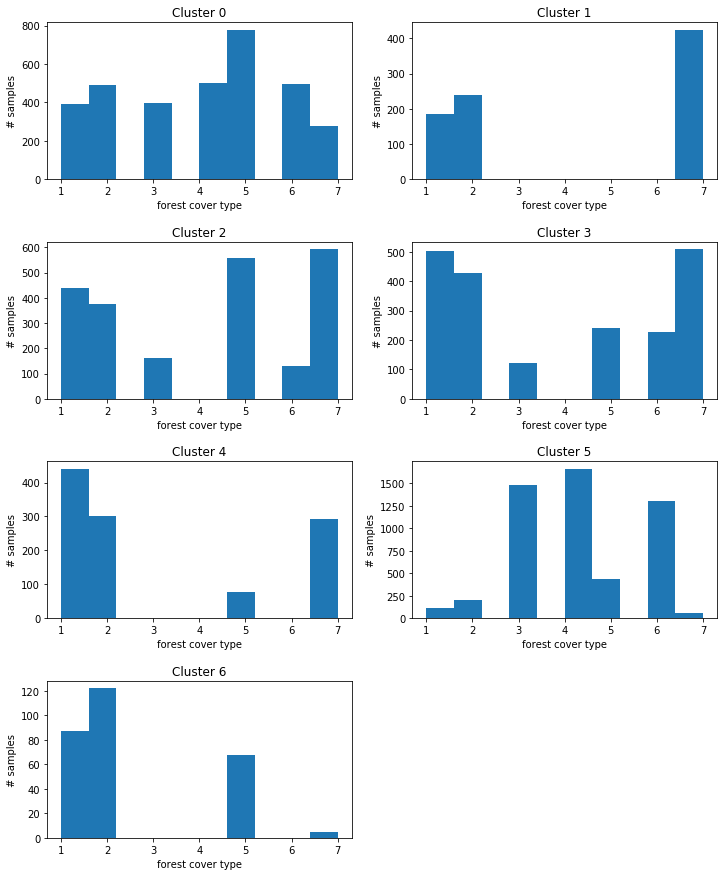

In [43]:
from sklearn.cluster import KMeans
from collections import Counter

nclusters = 7

print(X.shape)

kmeans = KMeans(n_clusters=nclusters, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(X)

print(Counter(y))

yhat = kmeans.labels_
# print(len(yhat))

# find all the points associated with a cluster and 
# collect their FC type into an array, so that we can
# look at the purity of a cluster wrt FC type.
clusterdata = [ [] for _ in range(nclusters) ]
# print(clusterdata)

for i in range(len(yhat)):
    clusterdata[yhat[i]].append(y[i])
print(len(clusterdata[1]))

plt.figure(figsize=(12, 15))

for c in range(nclusters):
    print('Gini of cluster '+str(c)+' = ' + str(gini(clusterdata[c])))
    plt.subplot(4,2,c+1)
    plt.hist(clusterdata[c])
    plt.xlabel('forest cover type')
    plt.ylabel('# samples')
    plt.title('Cluster '+str(c))

plt.subplots_adjust(hspace=0.4)
plt.show()

* the clusters don't look very pure! 
* it could be because the centroids were not initialized properly?

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


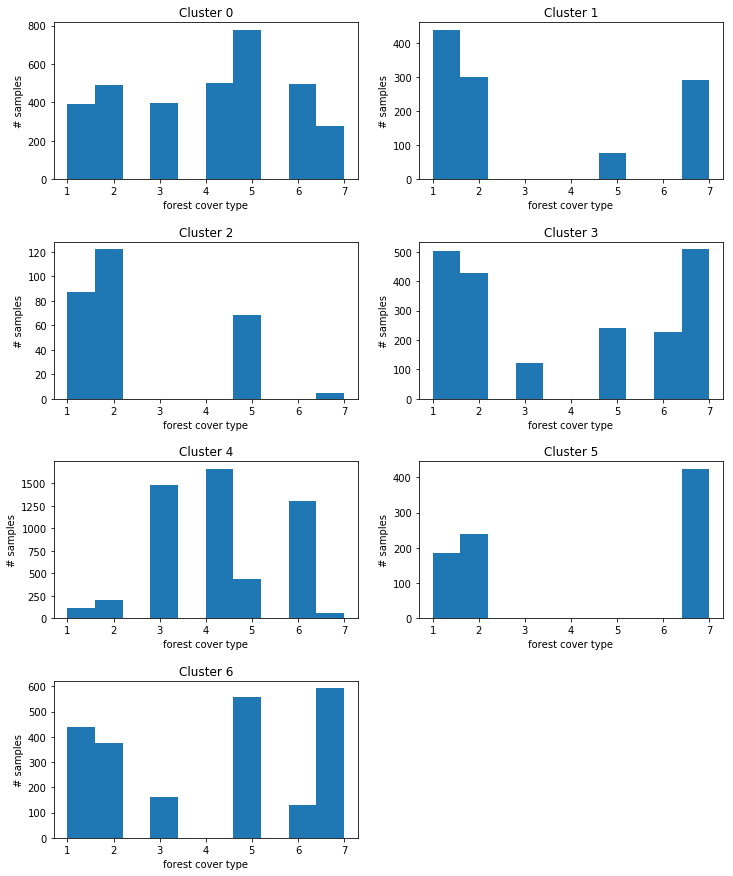

In [44]:
from sklearn.cluster import KMeans
from collections import Counter

nclusters = 7

# Since we know the FC type, we will pick one point 
# from each FC type as the centroid for a cluster
centroids={}
for i in range(len(X)):
    if y[i] not in centroids.keys():
        centroids[y[i]]=X[i]
    if len(centroids.keys())==7:
        break

#print(centroids.values())

initcentroids = np.array([ x for x in centroids.values()])

kmeans = KMeans(n_clusters=nclusters, init=initcentroids, max_iter=500, random_state=0)
kmeans.fit(X)

#print(Counter(y))

yhat = kmeans.labels_

clusterdata = [ [] for _ in range(nclusters) ]
for i in range(len(yhat)):
    clusterdata[yhat[i]].append(y[i])

plt.figure(figsize=(12, 15))

for c in range(nclusters):
    plt.subplot(4,2,c+1)
    plt.hist(clusterdata[c])
    plt.xlabel('forest cover type')
    plt.ylabel('# samples')
    plt.title('Cluster '+str(c))

plt.subplots_adjust(hspace=0.4)
plt.show()

* the clusters seem just as impure.
* Maybe the purity is much more localized into small neighborhoods.

[0.7037932569519838, 0.5916513376594144, 0.5572172877457977, 0.5330918045709885, 0.5103741206221618, 0.47890662652070565, 0.4716884164723403, 0.45815542061223824]


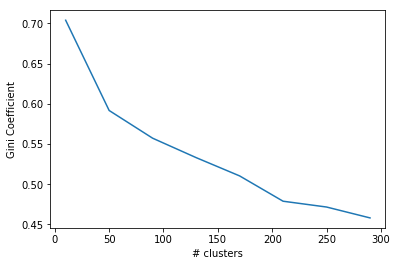

In [38]:

n = range(10,300,40)
purity=[]

for nclusters in n:

    kmeans = KMeans(n_clusters=nclusters, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X)

    yhat = kmeans.labels_

    clusterdata = [ [] for _ in range(nclusters) ]
    for i in range(len(yhat)):
        clusterdata[yhat[i]].append(y[i])

    total = 0.0
    for c in range(nclusters):
        total += gini(clusterdata[c])
    purity.append(total/nclusters)

print(purity)

plt.plot(n,purity)
plt.ylabel('Gini Coefficient')
plt.xlabel('# clusters')
plt.show()

* This seems to indicate that small neighborhoods around points are quite pure!
* Seems like a reasonable explanation of why kNN perform so well in HW1

## General: finding the right "k" (number of clusters)



In [18]:
from sklearn.cluster import KMeans

# calculate the variance of the data set
def getvar(X):
    xbar=np.zeros(X.shape[1])
    for x in X:
        xbar += x
    xbar /= X.shape[0]
    total=0.0
    for x in X:
        d = x-xbar
        total += np.dot(d,d)
    return total/X.shape[0]

# calculate the within-group variance
def getingrpvar(X, labels, centroids):
    total=0.0
    for i in range(X.shape[0]):
        d = X[i]-centroids[labels[i]]
        total += np.dot(d,d)
    return total/X.shape[0]

# calculate the between-group variance
def getbetgrpvar(X, labels, centroids):
    xbar=np.zeros(X.shape[1])
    for x in X:
        xbar += x
    xbar /= X.shape[0]
    total=0.0
    for i in range(X.shape[0]):
        d = centroids[labels[i]]-xbar
        total += np.dot(d,d)
    return total/X.shape[0]

nclusters=5
n = range(10,170,20)

sse = []
ev = []
for nclusters in n:
    kmeans = KMeans(n_clusters=nclusters, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X)
    v = getvar(X)
    bgv = getbetgrpvar(X, kmeans.labels_, kmeans.cluster_centers_)
    ev.append(bgv/v)
    sse.append(getingrpvar(X, kmeans.labels_, kmeans.cluster_centers_))
    
print(ev)




[0.85377601853718676, 0.93134896135072687, 0.95012230428901945, 0.95943329038994429, 0.96509608133309166, 0.96882214070606965, 0.97180624738338184, 0.97414718417330592]


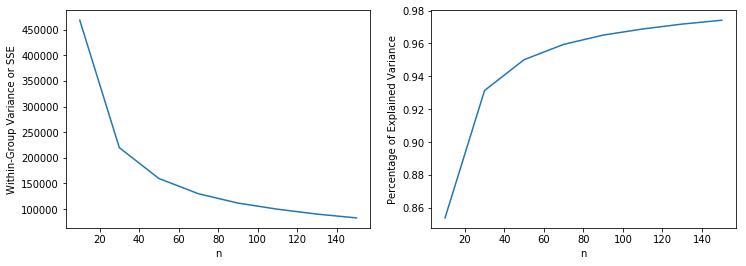

In [19]:

plt.figure(figsize=(12, 4))


# plot the SSE
plt.subplot(1,2,1)
plt.plot(n,sse)
plt.ylabel('Within-Group Variance or SSE')
plt.xlabel('n')

plt.subplot(1,2,2)
plt.plot(n,ev)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('n')


plt.show()


* both seem to show that the ideal k is near 40!

## How is clustering related to kNN ?